# 1. Tek değişkenli analiz
Olağan bir veri kümesi değişkenlerden oluşur. Veri araştırmasındaki ilk adım, değişkenleri tek tek incelemektir ki bu tek değişkenli analiz olarak adlandırılır. Tek değişkenli bir analizde, aşağıdaki gibi soruları cevaplamayı hedefleriz:

- Kaç tane değişkenimiz var?
- Veri kümesinde kaç veri noktası var??
- Hangi değişkenler sürekli, hangileri kategorik?
- Eksik veri var mı? Eğer öyleyse, ne kadar?
- Değişkenlerden herhangi birinin bilinen bir olasılık dağılımı var mı (normal, Poisson, Gamma, vb.)?
- Değişkenlerin her birinin merkezi eğilimleri nelerdir?
- Değişkenlerin her birinde ne kadar varyans var?

Pandas'ın .describe () metodu tek değişkenli analizde iyi bir başlangıç noktasıdır. Öyleyse, Youtube verilerimizi yükleyelim, temizleyelim ve .describe() metodunun sonucuna bir bakalım.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)
youtube = pd.read_csv("youtube_temiz.csv", index_col=0)
youtube.head()

,sira,derece,kanal_adi,video_sayisi,abone_sayisi,goruntulenme_sayisi
0,1st,A++,Zee TV,82757.0,18752952.0,20869786591
1,2nd,A++,T-Series,12661.0,61196304.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238252.0,9793305082
3,4th,A++,SET India,27323.0,31180560.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433


In [3]:
youtube["winsorize_video_sayisi"] = winsorize(youtube["video_sayisi"], (0, 0.10))
youtube["winsorize_aboneler"] = winsorize(youtube["abone_sayisi"], (0, 0.10))
youtube["winsorize_goruntulenme"] = winsorize(youtube["goruntulenme_sayisi"], (0, 0.10))
# Şimdi video_sayisi, abone_sayisi ve goruntulenme_sayisi değişkenlerini %90'lık yüzde ile winsorize edelim.

In [4]:
pd.options.display.float_format = '{:.3f}'.format
for i in range(0, len(youtube.derece)):
    if pd.isnull(youtube.derece[i]):
        youtube.derece[i] = youtube.derece[i-1]
        
youtube.describe()
# Null olan derece değerlerine de bir önceki değeri atayalım.

,video_sayisi,abone_sayisi,goruntulenme_sayisi,winsorize_video_sayisi,winsorize_aboneler,winsorize_goruntulenme
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,3859.464,2620004.435,1071449400.150,1288.414,2081597.006,782847594.720
std,17075.610,3771402.411,2003843972.124,1779.181,1781477.579,775430088.742
min,1.000,301.000,75.000,1.000,301.000,75.000
25%,141.000,666802.500,186232945.750,141.000,666802.500,186232945.750
50%,445.000,1544402.000,482054780.000,445.000,1544402.000,482054780.000
75%,1511.500,2723181.500,1124367826.750,1511.500,2723181.500,1124367826.750
max,422326.000,65995310.000,47548839843.000,5653.000,5895361.000,2468241402.000


.describe metodu “NaN değerleri hariç veri dağıtımının merkezi eğilimini, dağılımını ve şeklini özetleyen tanımlayıcı istatistikler üretir”.

- sayısal değişkenler için count, mean, quartiles gibi bazı istatistikleri döndürür. Bu istatistiklere ve bunların analizlerine, veri araştırmasında yaygın bir uygulama olan tanımlayıcı istatistikler denir.

- metin değişkenleri için count, unique, top ve freq değerlerini döndürür.

- varsayılan olarak, sonuçları yalnızca sayısal değişkenler için verir, metinler için döndürmez. Onları da görmek istiyorsak, tüm değişkenleri bir arada görmek için yönteme include='all' parametresini ya da sadece metin değişkenlerini görmek için include=['O'] parametresini ekleyebiliriz.

In [5]:
youtube.describe(include=['O'])

,sira,derece,kanal_adi
count,5000,5000,5000
unique,5000,5,4993
top,"4,380th",B+,Webs & Tiaras - Toy Monster…
freq,1,2960,2


Video yüklemelerinin ortalaması 3860 iken, winsorize varyantı için 1288'dir. Bu fark diğer değişkenler için de gözlemlenebilir.

Bu sadece aykırı değerlerin tanımlayıcı istatistikleri nasıl etkilediğinin bir göstergesidir. Analizinizin sonuçlarını önemli ölçüde etkileme eğiliminde olduklarından aşırı değerlere her zaman dikkat etmelisiniz. Dolayısıyla, verilerimizdeki merkezi eğilimi ortalama kullanarak özetlemek istiyorsak, aykırı değerlerin etkilerini her zaman göz önünde bulundurmalı ve ideal olarak temizlenmiş değişken üzerinde çalışmalıyız.

In [6]:
youtube.to_csv('youtube_winsorize.csv', encoding = 'utf8')

# 1.1. Tek değişkeni görselleştirme

## 1.1.1. Sürekli değişkenlerin görselleştirmesi

Herhangi bir değişkenin önemli bir yönü, dağılımıdır. Değişkenleri birer birer araştırırken, sık sık histogramlarını çizerek değişkenlerin dağılımını anlamaya çalışırız. Veri bilimcilerin, birçok modelin ve istatistiksel testlerin, verilerin normal şekilde dağıtılmasını gerektirdiği gerçeğinden dolayı normal dağılıma hayran olduğunu istatistik derslerinden hatırlayın. Bazı değişkenler normal olmayan bir şekilde dağıtılsalar bile, dağılımları hala yararlı olabilir ve bize verileri üreten süreçler hakkında fikir verebilir.

Tek değişkenli analizde, genellikle değişkenlerin histogramlarını bu amaç için çizeriz. Aşağıda, Youtube veri kümesindeki sürekli değişkenlerin histogramları verilmiştir. İlk satırlarda, orijinal değerlerin histogramlarının, ikinci ve üçüncü sıralarda winsorize edilmiş ve log dönüşümü yapılmış versiyonlarının histogramlarının verildiğine dikkat edin.

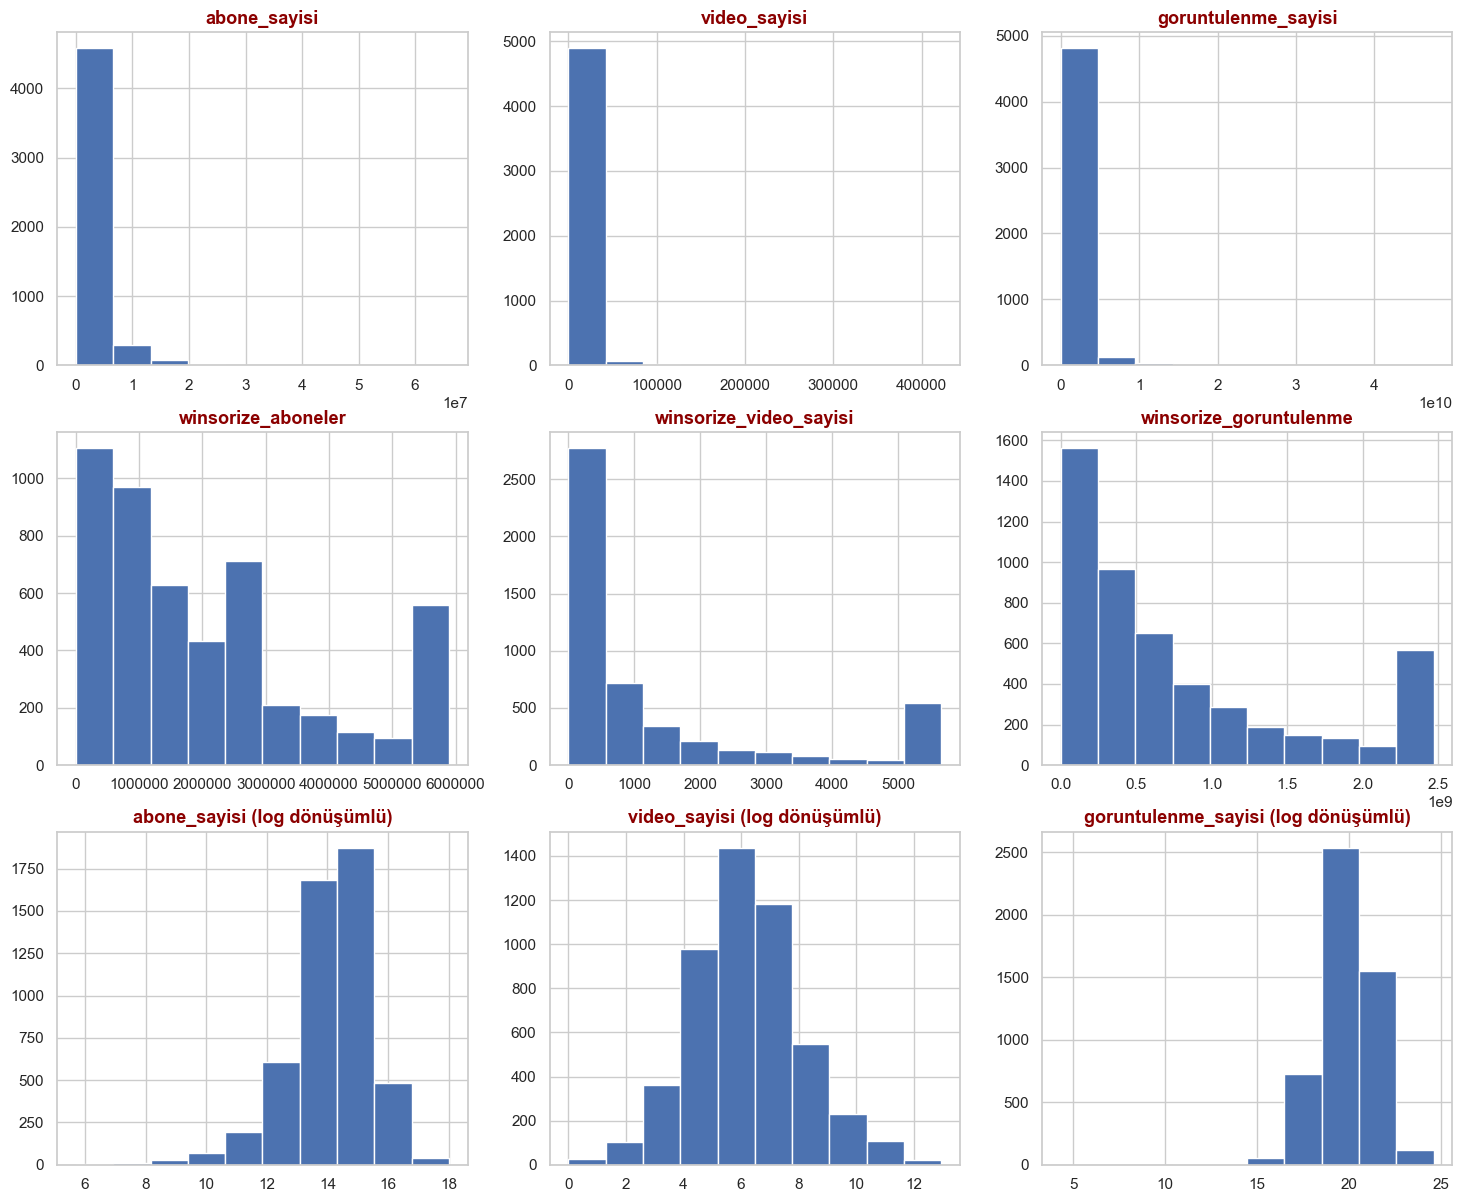

In [7]:
plt.figure(figsize=(18,15))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

degiskenler = ['abone_sayisi', 'video_sayisi' , 'goruntulenme_sayisi']
winsorize_degiskenler = ['winsorize_aboneler', 'winsorize_video_sayisi', 'winsorize_goruntulenme']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(youtube[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(youtube[winsorize_degiskenler[i]])
    plt.title(winsorize_degiskenler[i], fontdict=baslik_font)
    
for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(youtube[degiskenler[i]]))
    plt.title(degiskenler[i] + ' (log dönüşümlü)', fontdict=baslik_font)

Orijinal ve winsorize edilmiş değişkenlerin histogramları oldukça eğri dağılımları gösterir. Bununla birlikte, log dönüşümü yapılmış değerlerin dağılımları normal dağılıma daha çok benzemektedir.

## 1.1.2. Kategorik değişkenlerin görselleştirmesi

Kategorik değişkenlerin görselleştirilmesi, sürekli değişkenlerden biraz farklıdır, çünkü kategorik değişkenler sadece sınırlı sayıda farklı değere sahiptir. Kategorik özellikler için en yaygın kullanılan grafik türlerinden biri çubuk grafiklerdir. Aşağıda, derece değişkenindeki her değer için gözlem sayısını gösteren bir çubuk grafik çiziyoruz.

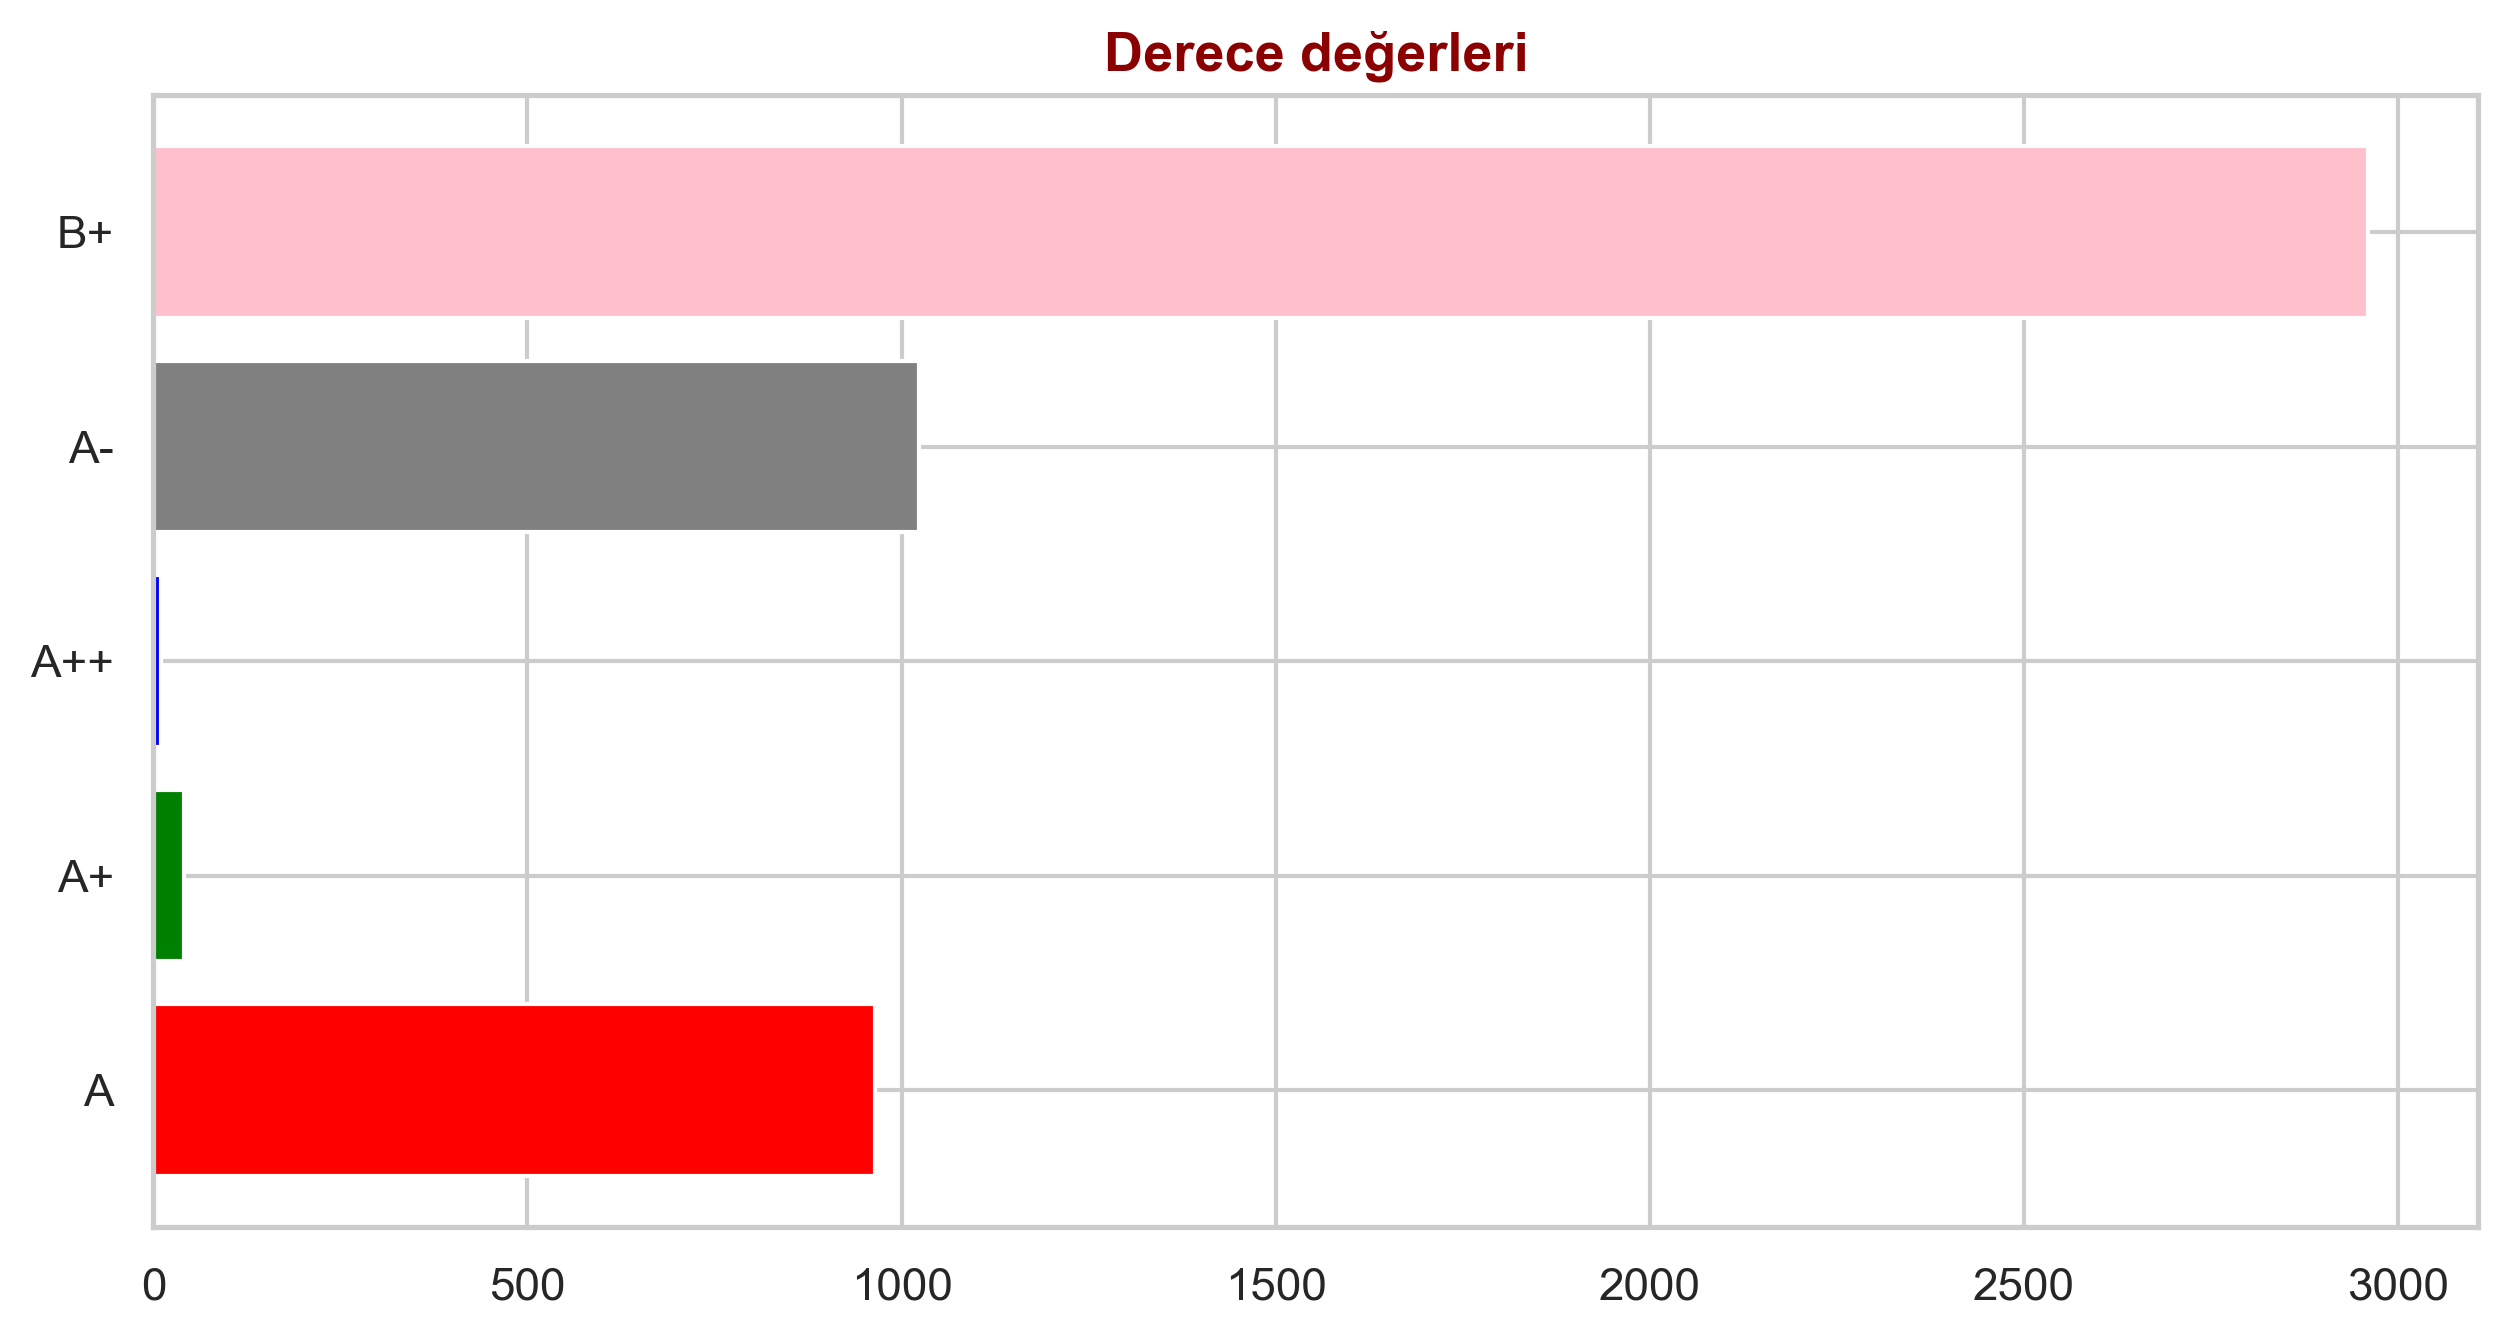

In [8]:
plt.figure(figsize=(10,5), dpi=300)
plt.barh(youtube.groupby("derece")["derece"].count().index, 
        youtube.groupby("derece")["derece"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("Derece değerleri", fontdict=baslik_font)

plt.show()

# WordCloud ( Kelime Bulutu)

In [9]:
!pip install wordcloud

In [10]:
from wordcloud import WordCloud

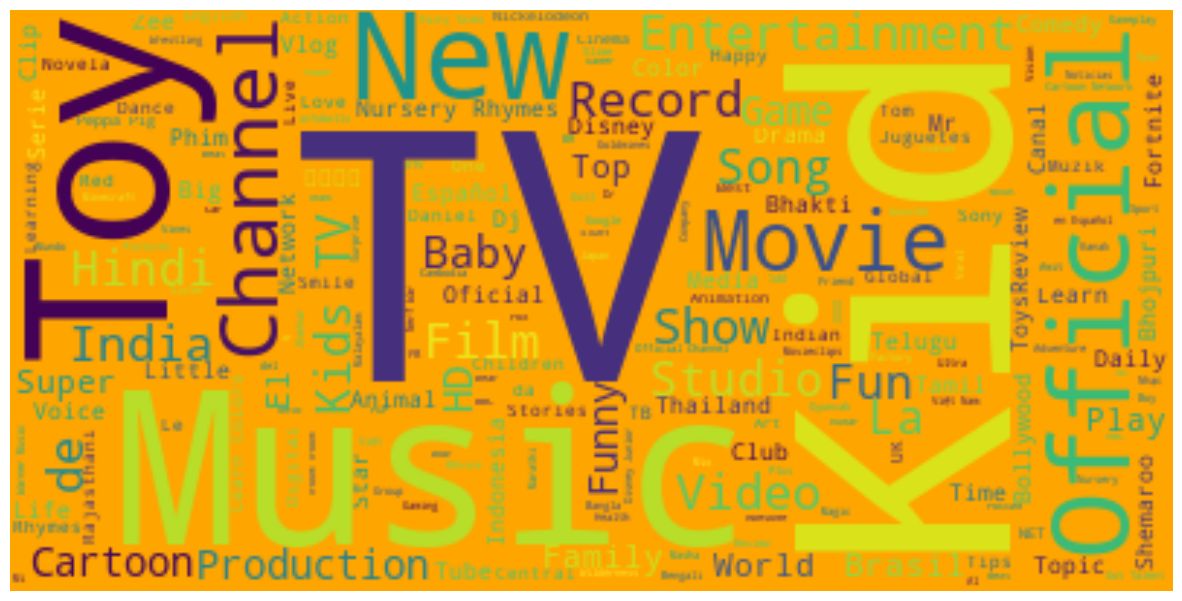

In [11]:
# word cloud imajı oluşturuyoruz.
wordcloud = WordCloud(background_color="orange").generate(" ".join(youtube["kanal_adi"]))
plt.figure(figsize=(15,10))
# Oluşturulan imajı gösteriyoruz.
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()